In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datadir = "/export/storage_adgandhi/MiscLi/VaccineDemandLiGandhi/Data"

Text(0, 0.5, 'Share of fully vaccinated')

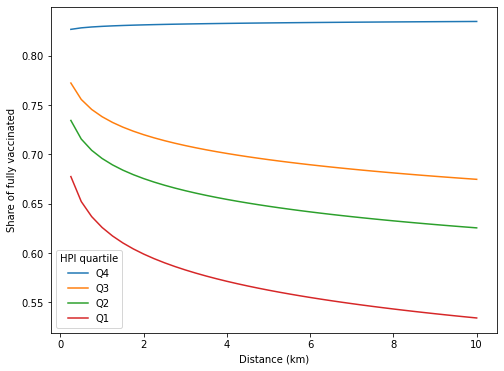

In [49]:
df_marg = pd.read_csv(f"{datadir}/Analysis/demest_margins.csv")
df_marg['logdist'] = np.log(df_marg['dist'])
# # plot shares by hpi quartile
df_marg['hpiquartile'] = df_marg['hpiquartile'].astype('category')
df_marg['hpiquartile'] = df_marg['hpiquartile'].cat.reorder_categories([4,3,2,1])
df_marg['hpiquartile'] = df_marg['hpiquartile'].cat.rename_categories(['Q4','Q3','Q2','Q1'])
# make x ticks

fig, ax = plt.subplots(figsize=(8,6))
for name, group in df_marg.groupby('hpiquartile'):
    group.plot(x='dist', y='shares', ax=ax, label=name)

xvals = np.unique(df_marg['dist'])
ax.legend(title='HPI quartile')
# ax.set_xticks(xvals)
# ax.set_xticklabels(np.round(xvals, 1))
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Share of fully vaccinated')
# ax.set_ylim(0.5,1)

In [2]:
df = pd.read_csv(f"{datadir}/Analysis/demest_pyblp.csv")

saving figure at:  /mnt/staff/zhli/elastplot_pyblp.png


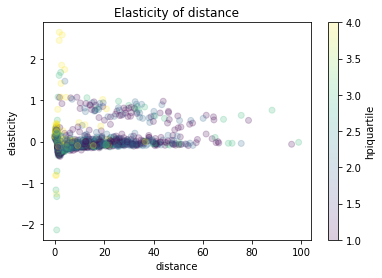

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel('distance')
ax.set_ylabel('elasticity')
ax.set_title('Elasticity of distance')
scatter = ax.scatter(df['dist'], df['dist_elast'], c=df['hpiquartile'], alpha=0.2)
# Optionally, to add a colorbar:
cbar = plt.colorbar(scatter)
cbar.set_label('hpiquartile')

figpath = f"/mnt/staff/zhli/elastplot_pyblp.png"
print("saving figure at: ", figpath)
plt.savefig(figpath)


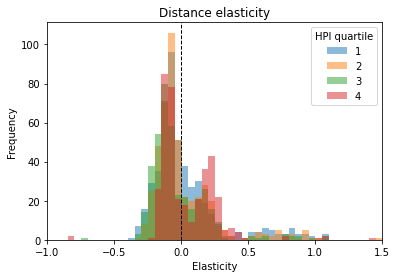

In [21]:
min_val = df['dist_elast'].min()
max_val = df['dist_elast'].max()
bin_width = 0.05
bins = np.arange(min_val, max_val + bin_width, bin_width)

for hpi in df['hpiquartile'].unique():
    df[df['hpiquartile'] == hpi]['dist_elast'].plot.hist(bins=bins, alpha=0.5, label=hpi)

plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Elasticity')
plt.ylabel('Frequency')
plt.xlim(-1, 1.5)
plt.title('Distance elasticity')
plt.legend(df['hpiquartile'].unique(), title='HPI quartile')
